In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#Data Collection and Processing


In [4]:
df = pd.read_csv("gld_price_data.csv")

In [5]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#to convert to datetime
date = pd.to_datetime(df["Date"])

In [9]:
date

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
          ...    
2285   2018-05-08
2286   2018-05-09
2287   2018-05-10
2288   2018-05-14
2289   2018-05-16
Name: Date, Length: 2290, dtype: datetime64[ns]

In [10]:
date.dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [11]:
 df.shape

(2290, 6)

In [12]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
 correlation = df.corr()

<AxesSubplot:>

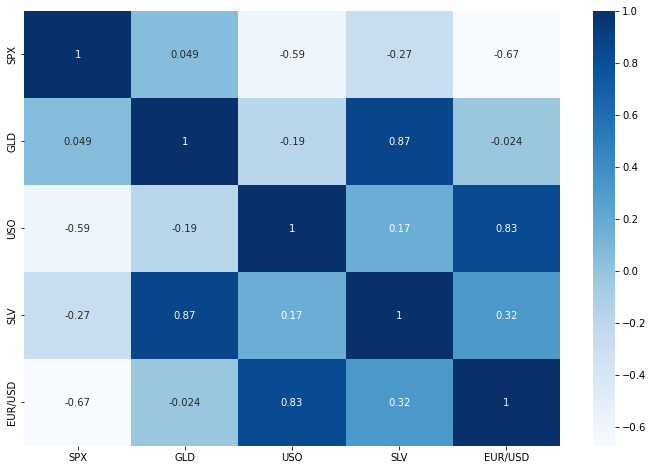

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation,annot = True,cbar = True,cmap = "Blues")

In [16]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [17]:
#checking the distreibution of Gold Price 

D:\Anconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

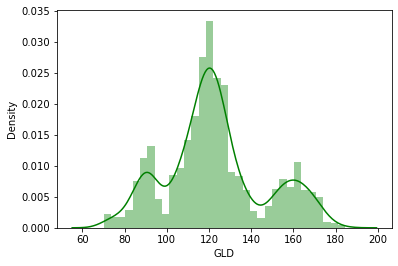

In [18]:
sns.distplot(df["GLD"],color = "green")

In [19]:
#Splitting the gold Price and Target

In [20]:
x = df.drop(["Date","GLD"],axis = 1)

In [21]:
y = df["GLD"]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 30)

In [23]:
regressor = RandomForestRegressor(n_estimators = 100)

In [24]:
regressor

RandomForestRegressor()

In [25]:
regressor.fit(x_train,y_train)
x_train.shape
y_train.shape

(1534,)

In [26]:
predict = regressor.predict(x_test)


In [27]:
#Rsquared Error

In [28]:
error_score = metrics.r2_score(predict,y_test)
print("R-squared_error:",error_score)

R-squared_error: 0.9877392372553994


In [29]:
regressor.feature_importances_
y_ttest = list(y_test)

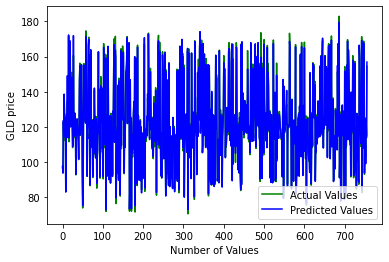

In [30]:
plt.plot(y_ttest,color = "green",label = "Actual Values")
plt.plot(predict ,color = "blue",label = "Predicted Values")
plt.legend()
plt.xlabel("Number of Values")
plt.ylabel("GLD price")
plt.show()

In [31]:
import pickle

In [33]:
with open("regressor.pkl","wb") as trial_model:
    pickle.dump(regressor,trial_model)

In [34]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.~Untitled27.ipynb',
 '50_Startups.csv',
 'aaaa.ipynb',
 'abalone data.csv',
 'admit.csv',
 'admit_missing.csv',
 'Advertising.csv',
 'airline_passengers.csv',
 'ARIMA.ipynb',
 'Assignment- Mean Median Mode SD Variance IQR-checkpoint.ipynb',
 'Assignment- Mean Median Mode SD Variance IQR.ipynb',
 'bank.csv',
 'bank_updated.csv',
 'Black.csv',
 'BlackFriday Implementation.ipynb',
 'Blackfriday.ipynb',
 'blacky.csv',
 'California Housing.csv',
 'California_housing.ipynb',
 'Champagne sales prediction.ipynb',
 'Clusty.ipynb',
 'CORREATION AND NORMALITY WITH MTCARS.ipynb',
 'Correlation and Normality with MT Cars.ipynb',
 'Covid 19 Predictions.ipynb',
 'Credit_card Assessment.ipynb',
 'credit_card.csv',
 'Customer Segmentation using K-Means Clustering with Python.ipynb',
 'DataFrames-checkpoint.ipynb',
 'DataFrames.ipynb',
 'Day+1+Revision.ipynb',
 'Decision Trees 1.ipynb',
 'Decision Trees.ipynb',
 'dff1.xlsx',
 'diabetes (1).csv',
 'Downloads',
 'Downloads - Copy

In [ ]:
with open("model.pkl","rb") as our_model:
    main_model = pickle.load(our_model)
s = [[]]
